# Exploring the different relationships between Fuel Consumption, Fuel Type, Engine Size and CO2 emissions : A Statistical Analysis

### Importing Necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import f
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pwlf
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

### Importing the dataset

In [2]:
filename = "C:/Users/15513/OneDrive - stevens.edu/Fuel consumption-MA541.csv"
df = pd.read_csv(filename)

In [3]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),CO2 Emissions(g/km)
0,Audi,Subcompact,2.0,4,X,8.5,6.6,178
1,Audi,SUV: Small,2.0,4,X,10.4,7.7,215
2,Audi,SUV: Small,2.0,4,X,11.4,8.3,233
3,Audi,Subcompact,2.0,4,X,10.5,7.9,218
4,Audi,Two-seater,2.0,4,X,10.5,7.9,218


In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),CO2 Emissions(g/km)
count,904.000000,904.000000,904.000000,904.000000,904.000000
mean,3.186504,5.646018,12.430420,9.297788,258.235619
std,1.388912,1.955407,3.380256,2.200336,65.418415
min,1.200000,3.000000,4.000000,3.900000,94.000000
25%,2.000000,4.000000,10.100000,7.700000,211.750000
50%,3.000000,6.000000,12.300000,9.200000,254.000000
75%,3.800000,6.000000,14.700000,10.600000,302.000000
max,8.000000,16.000000,30.300000,20.900000,608.000000


### To check for any NULL values or missing data

In [5]:
df.isna().sum()

Make                                 0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
CO2 Emissions(g/km)                  0
dtype: int64

### We can see that there are no missing/Null values

## Binning of column 'Enginesize(L)' to Small, Medium and Large.

In [7]:
df['Engsizebinned'] = pd.qcut(df['Engine Size(L)'],
                           q=[0, .4, .7, 1],
                           labels=['Small', 'Medium', 'Large',])
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),CO2 Emissions(g/km),Engsizebinned
0,Audi,Subcompact,2.0,4,X,8.5,6.6,178,Small
1,Audi,SUV: Small,2.0,4,X,10.4,7.7,215,Small
2,Audi,SUV: Small,2.0,4,X,11.4,8.3,233,Small
3,Audi,Subcompact,2.0,4,X,10.5,7.9,218,Small
4,Audi,Two-seater,2.0,4,X,10.5,7.9,218,Small
...,...,...,...,...,...,...,...,...,...
899,Volvo,SUV: Small,2.0,4,Z,10.7,7.7,219,Small
900,Volvo,SUV: Small,2.0,4,Z,10.5,8.1,219,Small
901,Volvo,SUV: Small,2.0,4,Z,11.0,8.7,232,Small
902,Volvo,SUV: Standard,2.0,4,Z,11.5,8.4,236,Small


### Since our datasets contains more than 900 rows (which is obviously greater than 30), we can say by Central Limit Theorem that we can assume that the sampling distribution of the mean will be approximately normal, even if the distribution of the individual data points in the dataset is not normal. 

# 4.1 Comparing Two Samples

### We can use the mean of our dataset as a good estimator of the population mean, and we can also use statistical tests that rely on the normality assumption, such as the t-test or z-test.

### Now, let's perform a two-sample Z-test to compare the means of 'Fuel Consumption (City (L/100 km)' between the two fuel types: X and Z

In [8]:
# Splitting the data into two groups based on fuel type
fuel_x = df[df['Fuel Type'] == 'X']['Fuel Consumption (City (L/100 km)']
fuel_z = df[df['Fuel Type'] == 'Z']['Fuel Consumption (City (L/100 km)']

# Calculate the sample means and standard deviations for each group
mean_x = fuel_x.mean()
mean_z = fuel_z.mean()
std_x = fuel_x.std()
std_z = fuel_z.std()

# Calculate the standard error of the difference between the means
se_diff = np.sqrt((std_x**2 / len(fuel_x)) + (std_z**2 / len(fuel_z)))

# Calculate the Z-score
z_score = (mean_x - mean_z) / se_diff

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(z_score))) 

In [9]:
print('Z-score:', z_score)
print('p-value:', p_value)

Z-score: -11.30347999594787
p-value: 0.0


### The Z-score of -11.303 and a p-value of 0.0 indicate that there is a statistically significant difference between the mean 'Fuel Consumption (City (L/100 km)' for the two fuel types. Since the p-value is less than the commonly used significance level of 0.05, we can reject the null hypothesis that the means are equal and conclude that there is strong evidence to support the alternative hypothesis that there is a difference in mean fuel consumption between 'Fuel Type X' and 'Fuel Type Z'.

## We can also do the F-test to compare the variances of the 'Fuel Consumption (City (L/100 km)' between the two fuel types 'X' and 'Z'.

In [10]:
# Calculate the variances for each group
var_x = fuel_x.var()
var_z = fuel_z.var()

# Calculate the F-statistic
f_stat = var_x / var_z

# Calculate the p-value
df1 = len(fuel_x) - 1
df2 = len(fuel_z) - 1
p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

In [11]:
print('F-statistic:', f_stat)
print('p-value:', p_value)

F-statistic: 0.8881432207603536
p-value: 0.20851835436063942


### The F-statistic of 0.888 and the p-value of 0.209 suggest that there is no significant difference in the variances of 'Fuel Consumption (City (L/100 km)' between the two fuel types. Since the p-value is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis that the variances are equal.

# 4.2 The Analysis of Variance

## Let's consider the binned column 'Engsizebinned' which has 3 categories: 'Small','Medium' and 'Large'. We can perform one-way ANOVA test here since there are more than 2 groups that are being considered. Here we are perfroming ANOVA of 'Engsizebinned' over 'CO2 Emissions(g/km)'

In [12]:
small_eng = df[df['Engsizebinned'] == 'Small']['CO2 Emissions(g/km)']
med_eng = df[df['Engsizebinned'] == 'Medium']['CO2 Emissions(g/km)']
large_eng = df[df['Engsizebinned'] == 'Large']['CO2 Emissions(g/km)']
f_stat, p_value = f_oneway(small_eng, med_eng, large_eng)

In [13]:
print('F-statistic:', f_stat)
print('p-value:', p_value)

F-statistic: 849.2263256437644
p-value: 5.002848265980419e-208


### The F-statistic of 849.2263256437644 and the p-value of 5.002848265980419e-208 indicate that there is a significant difference in means between at least two of the groups in the data. The extremely small p-value indicates that it is very unlikely to observe such a large F-statistic by chance, assuming the null hypothesis is true. Therefore, we can reject the null hypothesis of equal means across all groups and conclude that there is a significant difference in means between at least two groups.

## To determine which specific groups have significantly different means, we can perform a post-hoc test, such as Tukey's test. This test can help identify the specific groups that differ significantly from each other. 

In [14]:
mc_object = mc.MultiComparison(df['CO2 Emissions(g/km)'], df['Engsizebinned'])
result = mc_object.tukeyhsd()
print(result.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
 Large Medium  -65.8854   0.0  -74.0295  -57.7413   True
 Large  Small -128.5753   0.0 -135.9646 -121.1859   True
Medium  Small  -62.6899   0.0  -69.8863  -55.4935   True
--------------------------------------------------------


### We can see that all pairwise comparisons of means are statistically significant at the 0.05 significance level, as the p-values for all comparisons are less than 0.05.

### The output also provides information on the mean differences, their standard errors, and 95% confidence intervals for each pairwise comparison. For example, the mean difference between the Large and Medium groups is -65.8854, which means that the mean 'CO2 Emissions(g/km)' for the Large group is 65.8854 lower than the mean for the Medium group. The 95% confidence interval for this difference is [-74.0295, -57.7413]. Similarly, we can see that the mean 'CO2 Emissions(g/km)' for the Large group is 128.5753 lower than the Small group and 62.6899 lower for the Medium group compared to the Small group, with 95% confidence intervals of [-135.9646, -121.1859] and [-69.8863, -55.4935], respectively.

# 4.3 The Analysis of Categorical Data

### Let's do a Chi-squared test to analyze 2 categorical columns 'Engsizebinned' and 'Fuel Type' to see if there is any relationship between their means.

In [15]:
cont_table = pd.crosstab(df['Engsizebinned'], df['Fuel Type'])
stat, p, dof, expected = chi2_contingency(cont_table)

In [16]:
cont_table

Fuel Type,X,Z
Engsizebinned,,
Small,267,142
Medium,107,151
Large,72,165


In [17]:
print("Chi-squared statistic:", stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 82.05564766687257
p-value: 1.5199962085142224e-18
Degrees of freedom: 2
Expected frequencies:
 [[201.78539823 207.21460177]
 [127.28761062 130.71238938]
 [116.92699115 120.07300885]]


### Since the p-value < 0.05, then we can reject the null hypothesis that there is no association between the two variables, and conclude that there is a statistically significant relationship between the 'Engsizebinned' and 'Fuel Type' variables.

# 4.4 Linear Regression 

###  We are performing multiple Linear regression to our dataset

In [18]:
df.rename(columns = {'CO2 Emissions(g/km)':'CO2emissions'}, inplace = True)
df.rename(columns = {'Fuel Type':'Fueltype'}, inplace = True)
model = smf.ols(formula='CO2emissions ~ Fueltype + Engsizebinned', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2emissions   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     580.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          7.33e-210
Time:                        23:16:10   Log-Likelihood:                -4575.0
No. Observations:                 904   AIC:                             9158.
Df Residuals:                     900   BIC:                             9177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### The regression equation can be written as:
### CO2emissions = 202.9792 + 10.5318 * Fueltype[T.Z] + 60.1824 * Engsizebinned[T.Medium] + 124.8995 * Engsizebinned[T.Large]

### The coefficients indicate how much the dependent variable changes when the independent variable increases by 1, while holding all other independent variables constant. For example, the coefficient of Engsizebinned[T.Medium] is 60.1824, which means that, holding the Fueltype constant, the 'CO2emissions' will increase by 60.1824 g/km when the engine size is medium instead of small. Similarly, the coefficient of Fueltype[T.Z] is 10.5318, which means that, holding the Engsizebinned constant, the 'CO2emissions' will increase by 10.5318 g/km when the fuel type is Z instead of X.

### The R-squared value of 0.659 indicates that about 65.9% of the variability in the 'CO2emissions' can be explained by the independent variables included in the model. 

### The F-statistic and its associated p-value suggest that the model is statistically significant in predicting CO2emissions. 

## Visualizing the Linear regression

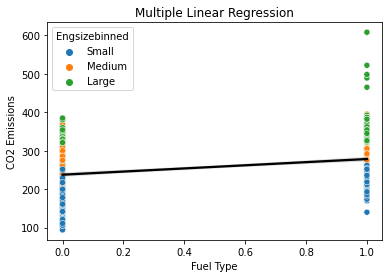

In [19]:
df['Fueltypecp'] = df['Fueltype']
fueltype_mapping = {'X': 0, 'Z': 1}
df['Fueltype'] = df['Fueltype'].replace(fueltype_mapping)
sns.scatterplot(data=df, x="Fueltype", y="CO2emissions", hue="Engsizebinned")
sns.regplot(data=df, x="Fueltype", y="CO2emissions", x_estimator=np.mean, scatter=False, color="black")
plt.title("Multiple Linear Regression")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions")
plt.show()

### Also, Since our dependent variable(y) 'CO2emissions' contains numeric values and not categorial values, we can't apply logistic regression.
### However, if we still want to do the logistic regression, then we need to categorize it.

# 4.5 Resampling methods

## Bootstrapping: Applying bootstrapping to the 'CO2emissions' column in the dataset:

In [20]:
CO2emissions = df['CO2emissions'].values
num_bootstraps = 1000
bootstrapped_stats = np.empty(num_bootstraps)
for i in range(num_bootstraps):
    bootstrap_sample = np.random.choice(CO2emissions, size=len(CO2emissions), replace=True)
    bootstrapped_stats[i] = np.mean(bootstrap_sample)
confidence_interval = np.percentile(bootstrapped_stats, [2.5, 97.5])
print("Bootstrap Mean: {:.2f}".format(np.mean(bootstrapped_stats)))
print("Bootstrap 95% Confidence Interval: [{:.2f}, {:.2f}]".format(confidence_interval[0], confidence_interval[1]))

Bootstrap Mean: 258.08
Bootstrap 95% Confidence Interval: [253.62, 262.62]


### The bootstrap 95% confidence interval of [253.70, 262.67] gives an estimated range of plausible values for the population mean of CO2 emissions. In other words, if we were to repeat the data collection process many times, the true mean of CO2 emissions would be expected to fall within this interval in approximately 95% of the cases.

## Cross-Validtion (5 fold)

In [21]:
label_encoder = LabelEncoder()
model = LinearRegression()
df['Engsizebinned'] = label_encoder.fit_transform(df['Engsizebinned'])
df['Fueltype'] = label_encoder.fit_transform(df['Fueltype'])
X = df[['Fueltype', 'Engsizebinned']]
y = df['CO2emissions']

In [22]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mean_r2 = scores.mean()

In [23]:
print('Cross-validation scores:', scores)
print('Average R-squared score:', scores.mean())

Cross-validation scores: [0.2227022  0.53601371 0.6803536  0.48620599 0.64270053]
Average R-squared score: 0.5135952066061625


### The average R-squared score for the 5-fold cross-validation is 0.5135952066061616, which indicates that the model is able to explain around 52% of the variance in the target variable (CO2emissions) using the predictor variables (Fueltype and Engsizebinned). This score is obtained by taking the mean of the R-squared scores calculated for each fold of the cross-validation.



 # 4.6 Linear Model Selection and Regularization

## Ridge Regression:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)
)
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train
print("Best hyperparameters: ", grid_search.best_params_)
test_score = grid_search.score(X_test, y_test)
print("Test R-squared score: ", test_score)

Best hyperparameters:  {'ridge__alpha': 10.0}
Test R-squared score:  0.593535290040575


### The best hyperparameter found was an alpha value of 10 for the Ridge regression model.
### The test R-squared score obtained with this model is 0.5935, which is an improvement over the initial linear regression model. This means that the model explains around 59.35% of the variability in the test set.

## Lasso Regression:

In [25]:
lasso_pipe = make_pipeline(
    StandardScaler(),
    Lasso(random_state=21)
)    
lasso_param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]
}
lasso_grid = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='r2'
)
lasso_grid.fit(X_train, y_train)
print("Best hyperparameters: ", lasso_grid.best_params_)
print("Test R-squared score: ", lasso_grid.score(X_test, y_test))

Best hyperparameters:  {'lasso__alpha': 0.1}
Test R-squared score:  0.594323590110876


### Lasso Regression is more suitable for this dataset

# 4.7 Moving beyond Linearity 

### We'll perform the polynomial regression ( degrees 1 to 10) for our model

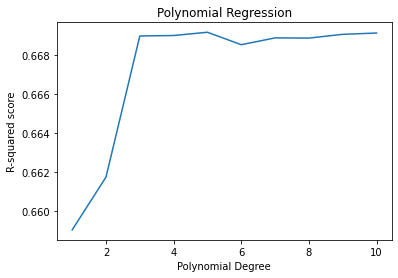

In [26]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r2_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2_scores.append(r2_score(y, y_pred))

plt.plot(degrees, r2_scores)
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared score')
plt.title('Polynomial Regression')
plt.show()

### We can see that for degree = 4 and beyond, the r2 score is much more higher(around 67%) than for degree = 1,2 or 3

## Piecewise Linear spline model

In [27]:
df1 = pd.read_csv("C:/Users/15513/OneDrive - stevens.edu/Fuel consumption-MA541.csv")
df1 = df1[['Engine Size(L)', 'CO2 Emissions(g/km)']].dropna()
x = df1['Engine Size(L)'].values
y = df1['CO2 Emissions(g/km)'].values
linear_fit = pwlf.PiecewiseLinFit(x, y)
linear_fit.fitfast(2)
linear_r2 = r2_score(y, linear_fit.predict(x))
print(f"R-squared score: {linear_r2:.4f}")

R-squared score: 0.6942


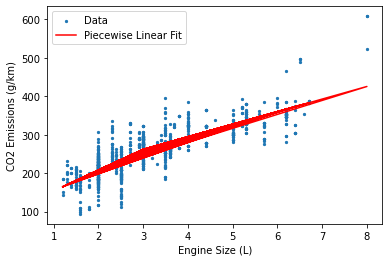

In [28]:
linear_pred = linear_fit.predict(x)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, linear_pred, color='r', label='Piecewise Linear Fit')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.show()

### Based on the piecewise linear regression analysis, we can see that the relationship between engine size and CO2 emissions is not a simple linear relationship, but rather a relationship that can be better represented by piecewise linear functions. This suggests that there may be different factors affecting CO2 emissions at different ranges of engine sizes.

## Cubic Spline

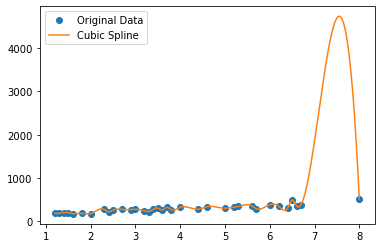

1.0

In [29]:
x = df1.iloc[:, 0].to_numpy()
y = df1.iloc[:, 1].to_numpy()
x, idx = np.unique(x, return_index=True)
y = y[idx]
idx = np.argsort(x)
x = x[idx]
y = y[idx]
cs = interp1d(x, y, kind='cubic')
x_new = np.linspace(x.min(), x.max(), num=1000)
y_new = cs(x_new)
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_new, y_new, label='Cubic Spline')
plt.legend()
plt.show()
r2_score(y, cs(x))

### A R-squared score of 1 indicates that the cubic spline perfectly fits the data. It means that all the variability in the data is accounted for by the model.